In [27]:
import weather_data as wd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import aiml
import os
import matplotlib.image as mpimg

In [59]:
def wind(abbr):
    l1 = ["Noord", "NNO", "NO", "ONO", "Oost", "OZO", "ZO", "ZZO", "Zuid", "ZZW", "ZW", "WZW", "West", "WNW", "NW","NNW", "VAR"]
    l2 = ["noord", "noordnoordoost", "noordoost", "oostnoordoost", "oost", "oostzuidoost", "zuidoost", "zuidzuidoost", 
     "zuid", "zuidzuidwest", "zuidwest", "zestzuidwest", "west", "westnoordwest", "noordwest", "noordnoordwest", "geen"]
    for i, j in enumerate(l1): 
        if abbr == j:
            return l2[i]
wind("NNO") 
    
def display_wind(winddir):
    l1 = ["N.png", "NNO.png", "NO.png", "ONO.png", "O.png", "OZO.png", "ZO.png", "ZZO.png", "Z.png", "ZZW.png", "ZW.png", "WZW.png", "W.png", "WNW.png", "NW.png","NNW.png", "VAR.png"]
    l2 = ["noord", "noordnoordoost", "noordoost", "oostnoordoost", "oost", "oostzuidoost", "zuidoost", "zuidzuidoost", 
     "zuid", "zuidzuidwest", "zuidwest", "zestzuidwest", "west", "westnoordwest", "noordwest", "noordnoordwest", "geen"]
    for i, j in enumerate(l2):
        if winddir == j:
            return(mpimg.imread('images/'+l1[i]))

Loading start_bot.xml...done (0.00 seconds)
Loading aiml/basic_chat.aiml...done (0.00 seconds)
Loading aiml/weather_chat.aiml...done (0.00 seconds)
Loading aiml/specifics.aiml...done (0.00 seconds)
Enter your message >> hoe is het weer in hoorn
Momenteel is het geheel bewolkt en 7.9 °C in hoorn.
Wilt u meer weten over het weer in hoorn?
Enter your message >> ja
Waarover wilt u meer informatie?
Enter your message >> de wind
De wind waait in hoorn vanuit het westen met windkracht 3. Wilt u een windvoorspelling?
Enter your message >> ja
Vandaag zal de wind hoofdzakelijk vanuit het noordoosten komen met windkracht 3. Morgen waait de wind vanuit zuidwestelijke richting met windkracht 3 en overmorgen vanuit zuidwestelijke richting met windkracht 3. Wilt u een graphische weergave?
Enter your message >> ja
0
1
2


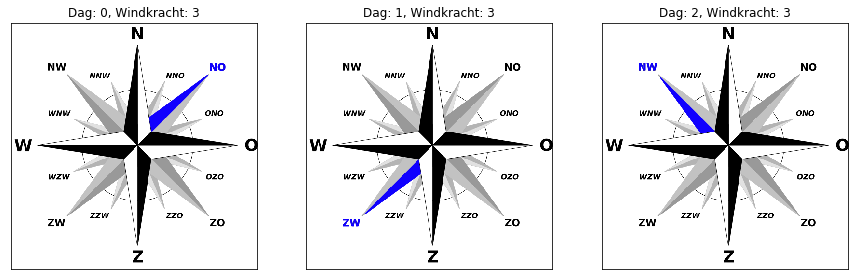

Wilt u meer weten over het weer in hoorn?


In [ ]:
# Create the kernel and learn AIML files
kernel = aiml.Kernel()
kernel.learn("start_bot.xml")
kernel.respond("load aiml")

kernel.setBotPredicate("name", "WeatherBot")

# Press CTRL-C to break this loop
while True:
    message = input("Enter your message >> ")
    if message == "quit":
        break #useful in notebook
        # exit() # useful in actual application
    elif message == "save":
        kernel.saveBrain("aiml/bot_brain.brn")
    else:
        bot_response = kernel.respond(message)
        if kernel.getPredicate("graph_temp") == "1":
            tmax_0 = int(kernel.getPredicate("d0tmax"))
            tmax_1 = int(kernel.getPredicate("d1tmax"))
            tmax_2 = int(kernel.getPredicate("d2tmax"))
            tmin_0 = int(kernel.getPredicate("d0tmin"))
            tmin_1 = int(kernel.getPredicate("d1tmin"))
            tmin_2 = int(kernel.getPredicate("d2tmin"))
            tmax = [tmax_0, tmax_1, tmax_2]
            tmin = [tmin_0, tmin_1, tmin_2]
            days = ["vandaag", "morgen", "overmorgen"]
            l2 = plt.plot(days, tmin, color = "blue", label="minimum temperatuur")
            l1 = plt.plot(days, tmax, color = "orange", label="maximum temperatuur")
            plt.xlabel("Tijdstip")
            plt.ylabel("Temperatuur")
            plt.legend()
            plt.show()
            kernel.setPredicate("graph_temp", "0")
            print(kernel.respond('SPECIFICS'))
        elif kernel.getPredicate("graph_temp") == "2":
            fig = plt.figure()
            fig.set_figheight(15)
            fig.set_figwidth(15)
            for i in ["d0", "d1", "d2"]:
                ax = fig.add_subplot(1,3,int(i[1])+1)
                plt.xticks([])
                plt.yticks([])
                plt.title("Dag: "+i[1] +", Windkracht: "+ kernel.getPredicate(i+"windk"))
                plt.imshow(display_wind(kernel.getPredicate(i+"windr")))
            plt.show()
            kernel.setPredicate("graph_temp", "0")
            print(kernel.respond('SPECIFICS'))
        elif kernel.getPredicate("flag") == "1":
            #weather_dict = wd.weather_data(kernel.getPredicate("cur_weather_loc"))
            weather_dict = {'plaats': 'Hoorn', 'temp': '7.9', 'gtemp': '4.9', 'samenv': 'Geheel bewolkt', 'lv': '67', 'windr': 'West', 'windms': '5', 'winds': '3', 'windk': '9.7', 'windkmh': '18', 'luchtd': '1021.5', 'ldmmhg': '766', 'dauwp': '1', 'zicht': '40', 'verw': 'Wolkenvelden en in het noorden een bui, in het zuiden zonnig', 'sup': '07:10', 'sunder': '20:17', 'image': 'bewolkt', 'd0weer': 'zonnig', 'd0tmax': '11', 'd0tmin': '1', 'd0windk': '3', 'd0windknp': '8', 'd0windms': '4', 'd0windkmh': '15', 'd0windr': 'NO', 'd0neerslag': '4', 'd0zon': '86', 'd1weer': 'halfbewolkt', 'd1tmax': '11', 'd1tmin': '1', 'd1windk': '3', 'd1windknp': '8', 'd1windms': '4', 'd1windkmh': '15', 'd1windr': 'ZW', 'd1neerslag': '20', 'd1zon': '40', 'd2weer': 'bewolkt', 'd2tmax': '8', 'd2tmin': '4', 'd2windk': '3', 'd2windknp': '8', 'd2windms': '4', 'd2windkmh': '15', 'd2windr': 'NW', 'd2neerslag': '30', 'd2zon': '30', 'alarm': '0', '$id': '51', 'stationid': 6248, 'stationname': 'Meetstation Wijdenes', 'lat': 52.63, 'lon': 5.17, 'regio': 'Hoorn', 'timestamp': '2020-04-01T14:50:00', 'weatherdescription': 'Zwaar bewolkt', 'iconurl': 'https://www.buienradar.nl/resources/images/icons/weather/30x30/c.png', 'graphUrl': 'https://www.buienradar.nl/nederland/weerbericht/weergrafieken/c', 'winddirection': 'W', 'windgusts': 5.1, 'windspeed': 3.1, 'windspeedBft': 2, 'winddirectiondegrees': 264}
            kernel.setPredicate("weather_descr", weather_dict["samenv"])
            kernel.setPredicate("temp", weather_dict["temp"])
            print(kernel.respond('CURRENT WEATHER LOC'))
            print(kernel.respond('SPECIFICS'))
            for i in weather_dict:
                if "windr" in i: 
                    kernel.setPredicate(i, wind(weather_dict[i]))
                else:
                    kernel.setPredicate(i, weather_dict[i])
            kernel.setPredicate("flag", "0")
        else:
            print(bot_response)

In [18]:
wd.weather_data("Jaagpad 4 de kwakel")['temp']

'10.1'